В этой работе вам предстоит исследовать неточности в данных и устранить их. В конце – проанализировать результаты.

Все необходимые этапы предобработки данных описаны в задании, ваша задача – реализовать их.

# Данные

[Monster.com jobs](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data) - датасет о вакансиях, данные в котором намеренно не предобработаны. Есть несколько сомнительных столбцов с 1 уникальным значением, тип работы не стандартизирован, расположение может содержать штат, город и почтовый индекс или только часть из этих данных, или совершенно неясные данные вроде "Contact name Tony Zerio" или "Sr. Process Engineer, Manufacturing", в графе с зарплатой помимо зарплаты есть вещи вроде "Excellent Pay and Incentives" и другие проблемы.

Практически все столбцы в датасете нельзя использовать для анализа без предобработки.

К датасету на kaggle приложен блокнот с примером его очистки. Рекомендуется ознакомиться с ним после выполнения задания, чтобы оценить сходства и различия в подходах.

Целью обработки датасета будем считать использование для многостороннего изучения данных в дальнейшем, то есть мы обработаем данные таким образом чтобы их удобно было использовать для широкого спекра задач анализа данных.

### Изучение датасета

In [ ]:
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt

Загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/monster_com-job_sample.csv')
df.sample(10)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
5935,United States of America,US,NaN,No,jobs.monster.com,The Ideal Candidate would have the following q...,Paralegal/Legal Assistant Job in Dallas,Full Time,"Dallas, TX 75230",Legal Services,http://jobview.monster.com/Paralegal-Legal-Ass...,NaN,Entry Level,f4959d8b3de5b71fa730283b49641163
3290,United States of America,US,NaN,No,jobs.monster.com,"Location: Monterey, CAOverview:Provides Tier 1...",Technical Support Technician Job in Monterey,NaN,"Location: Monterey, CAOverview:Provides Tier 1...",NaN,http://jobview.monster.com/Technical-Support-T...,NaN,Experienced (Non-Manager),5d08b5e52b75acf35d072ba2e72d250d
8758,United States of America,US,NaN,No,jobs.monster.com,"Imperial Guard Service in Austin, TX Needs Se...",Austin Security Guards - Hi Tech Facility Job ...,Full Time Employee,"Austin, TX",Security and Surveillance,http://jobview.monster.com/austin-security-gua...,NaN,Security/Protective Services,a6bd9776e1b4379c8c9f4b6581191e0d
17356,United States of America,US,NaN,No,jobs.monster.com,SAP SuccessFactors Managing Consultant - Compe...,SAP SuccessFactors Managing Consultant - Compe...,Full Time,"Dallas, TX",Computer/IT Services,http://jobview.monster.com/SAP-SuccessFactors-...,NaN,NaN,331d3c8f7f5bcca8cf708b2bc7e0d935
10046,United States of America,US,NaN,No,jobs.monster.com,If you're looking for the benefits of joining ...,Utility Worker -Car Detailer PART TIME Job in ...,Full Time / Employee,"Overland, MO",NaN,http://jobview.monster.com/Utility-Worker-Car-...,NaN,Manufacturing/Production/Operations,ce7cd71a2a9b99be92da3c9bfaf40d67
6307,United States of America,US,NaN,No,jobs.monster.com,12N Horizontal Construction Engineers Job Desc...,N Horizontal Construction Engineers Job in Mt ...,Full Time Employee,"Mt Pleasant, UT 84647",NaN,http://jobview.monster.com/12n-horizontal-cons...,NaN,Entry Level,5ab079e59c9e00c40b527e99ea7782c5
11627,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job If you are a Sup...,CyberCoders Job Application for Superintendent...,"Full Time, Employee",Contact name Aaron Wilks,Construction - Industrial Facilities and Infra...,http://jobview.monster.com/superintendent-civi...,NaN,NaN,13f98bb2ddec016e38ba82bbea3e9277
11140,United States of America,US,NaN,No,jobs.monster.com,Summary EVENT Specialist PART TIME SALES Are...,Event Specialist Part Time Sales _PSS Job in M...,Part Time Employee,"Milwaukee, WI",Retail,http://jobview.monster.com/event-specialist-pa...,NaN,Sales/Retail/Business Development,5451159a9a1cfe38440a07fac2f98a91
21811,United States of America,US,NaN,No,jobs.monster.com,This person will be the only Revit person at t...,Architect/Revit Job in Newport,Temporary/Contract/Project,"Newport, KY 41072",Architectural and Design Services,http://jobview.monster.com/Architect-Revit-Job...,NaN,Entry Level,d8c51f358b96ff5d9ba51c6a3567f4ac
3586,United States of America,US,NaN,No,jobs.monster.com,Job Description: · Development and d...,IBM BPM Application Developer Job in Cincinnati,"Full Time, Temporary/Contract/Project","Cincinnati, OH 45202",Computer/IT Services,http://jobview.monster.com/IBM-BPM-Application...,NaN,IT/Software Development,b8f2a3e109e294cb874cc8c9abc899ba


**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.

(Таблицу можно представить в виде текстового поля, датафрейма или картинки – формат неважен, важно содержание)

In [ ]:
data = {
    "Название": ["country", "country_code", "date_added", "has_expired", "job_board", "job_description", "job_title", "job_type", "location", "organization", "page_url", "salary", "sector", "uniq_id"],
    "Тип данных": ["string", "string", "?", "string", "string", "string", "string", "string", "string", "string", "string", "?", "string", "string"],
    "Описание проблемы": ["проблем нет", "проблем нет", "везде NaN", "проблем нет", "проблем нет", "проблем нет", "проблем нет", "есть NaN", "не стандартизированно", "есть NaN", "проблем нет", "есть NaN, не стандартизированно", "есть NaN", "проблем нет"]
}

df1 = pd.DataFrame(data)
display(df1)


,Название,Тип данных,Описание проблемы
0,country,string,проблем нет
1,country_code,string,проблем нет
2,date_added,?,везде NaN
3,has_expired,string,проблем нет
4,job_board,string,проблем нет
5,job_description,string,проблем нет
6,job_title,string,проблем нет
7,job_type,string,есть NaN
8,location,string,не стандартизированно
9,organization,string,есть NaN


#### Пустые значения

Начнем работу: проанализируем пустые ячейки.
Выясните, в каких столбцах и в каком количестве отсутствуют данные.

> Помимо создания таблички, воспользуйтесь библиотекой `missingno` и визуально оцените количество пропущенных данных.

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

country                0
country_code           0
date_added         21878
has_expired            0
job_board              0
job_description        0
job_title              0
job_type            1628
location               0
organization        6867
page_url               0
salary             18554
sector              5194
uniq_id                0
dtype: int64


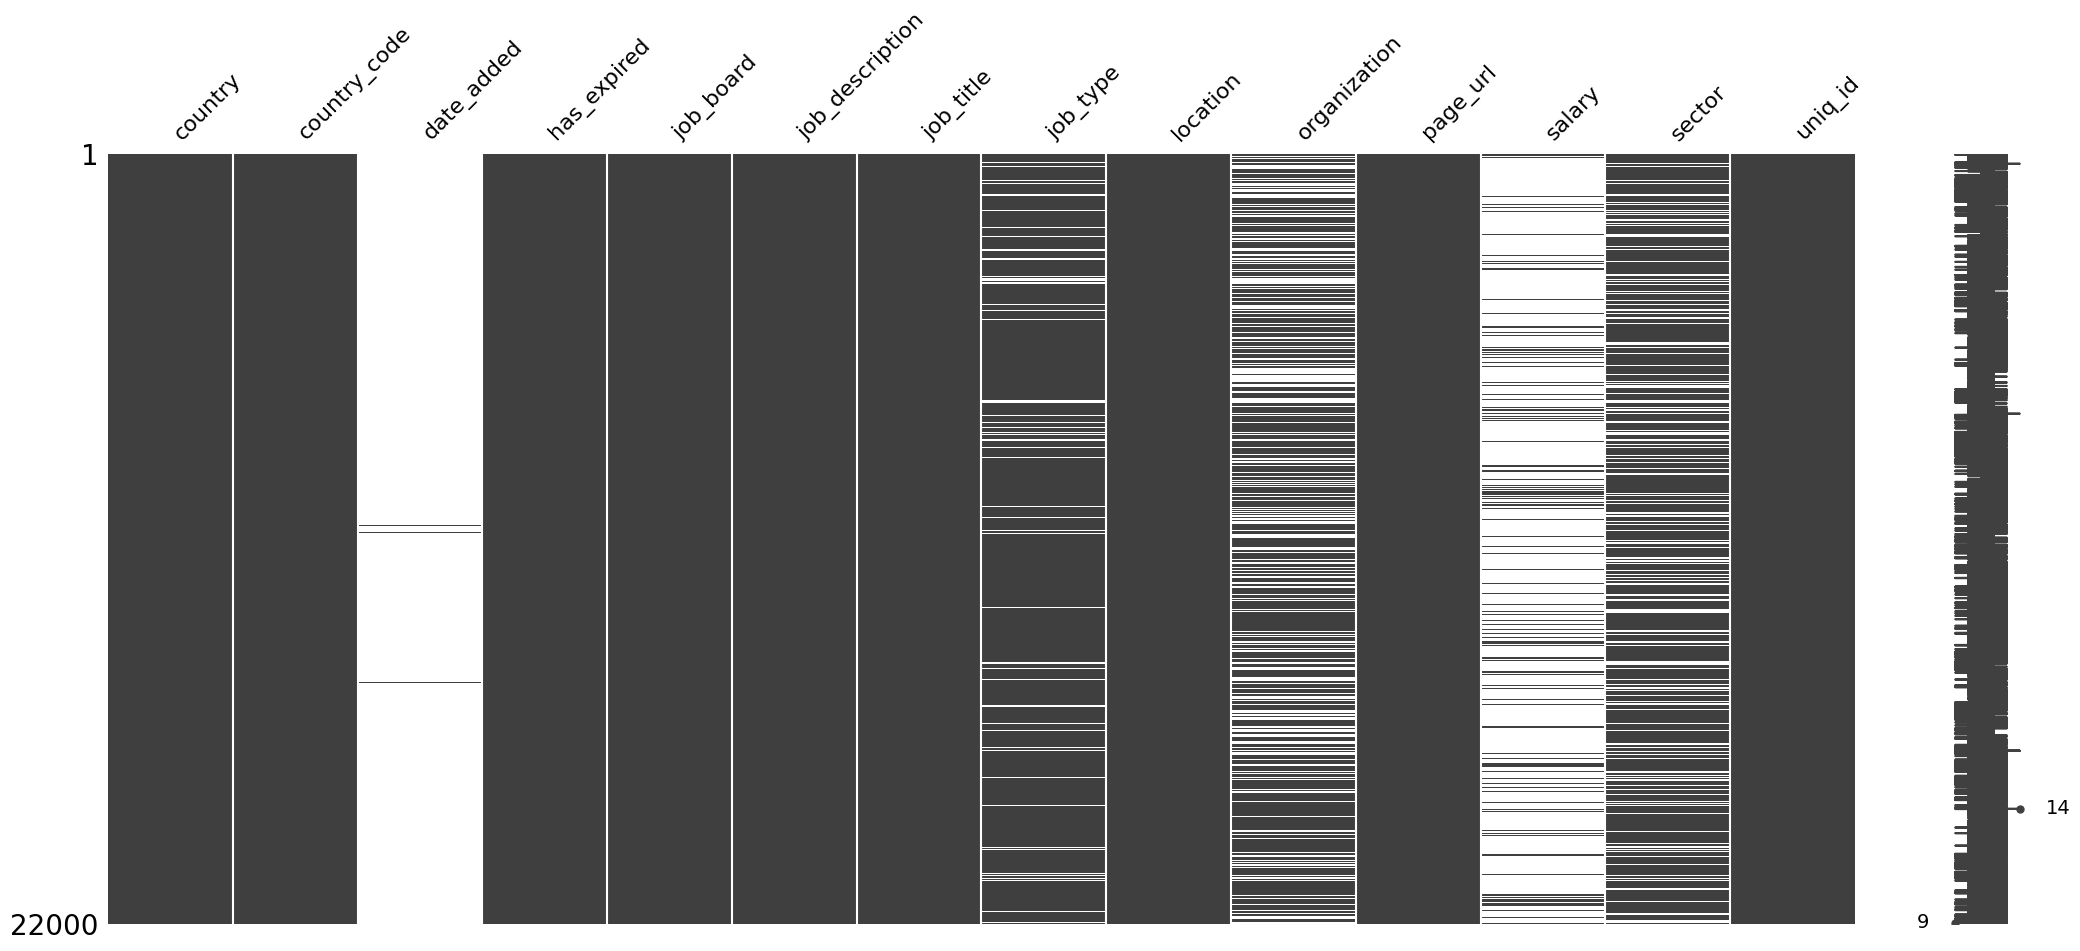

In [ ]:
msno.matrix(df)
plt.show()

Проверьте, как изменится размер датасета, если мы примем решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [ ]:
# Удаление строк с пустыми значениями
df_cleaned = df.dropna()

print("Размер исходного датасета:", df.shape)
print("Размер очищенного датасета:", df_cleaned.shape)

Размер исходного датасета: (22000, 14)
Размер очищенного датасета: (5, 14)


Принимаем решение сохранить как можно больше данных, удалять все – плохой план. Если удалить все, можем потерять важную информацию.

#### Нерелевантные колонки

Оценим, какие столбцы необходимо оставить, а какие можно удалить.
Рассмотрите следующие идеи:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли столбцы, в которых содержатся данные, которые есть еще в каком-то столбце?
3. Какие столбцы содержательно нерелевантны? Обоснуйте.

In [ ]:
# Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?

# Считаем сколько уникальных значений в каждом столбце
unique_values = df.nunique()

# Смотрим, в каких столбцах одно уникальное значение
one_value = unique_values[unique_values == 1]

print("Столбцы с одним значением:")
print(one_value) # выводим серию
print()

Столбцы с одним значением:
country         1
country_code    1
has_expired     1
job_board       1
dtype: int64



In [ ]:
# Есть ли столбцы, в которых содержатся данные, которые есть еще в каком-то столбце?

print("Столбцы с дубликатами:")
duplicates_columns = df.apply(lambda row: row.dropna().duplicated(keep=False), axis=1)
columns_with_true = duplicates_columns.columns[duplicates_columns.any()]
print(columns_with_true)

# Чтобы вывести строки, в которых повторяются значения (пустые значения не учитываются):
# df_copy = df.copy()
# df_copy['Duplicates'] = df_copy.apply(lambda row: len(row.dropna()) != len(set(row.dropna())), axis=1)
# result = df_copy.loc[df_copy['Duplicates'] == True]
# display(result.sample(20))

# Чтобы посмотреть в каких столбцах в каждой строке дублируются значения (пустые значения учитываются):
# duplicates_columns = df.apply(lambda row: row.duplicated(keep=False), axis=1)
# duplicates_columns = duplicates_columns.apply(lambda row: df.columns[row].tolist(), axis=1)
# duplicates_columns = duplicates_columns.loc[duplicates_columns.apply(lambda x: len(x) > 0)]
# display(duplicates_columns)

Столбцы с дубликатами:
Index(['job_description', 'job_title', 'location', 'organization', 'sector'], dtype='object')


Анализируя столбцы, мы можем сказать, что можно убрать столбец country_code, так как он по сути дублирует столбец country. Также можно убрать и столбец country, так как данные собраны только по одной стране - США. Помимо этого, можно убрать столбец has_expired, так как в нем все значения = "No", что значит, что все записи действительны. Можно убрать столбец job_board, так как все вакансии взяты с одного сайта, очевидно какого.

На мой взгляд, также можно убрать столбцы uniq_id и page_url (не несут никакой информации) и date_added (практически все значения пустые). date_added также можно удалить, потому что все вакансии актуальны в датасете (не has_expired), однако одну и ту же вакансию могли разместить несколько раз (в разные дни). Это мешает анализу.

Также анализ показал, что иногда одно и то же значение пишется в нескольких столбцах одновременно - например, job_title в job_description и location или sector в organization.

#### Дублирование данных

В данных есть строки с разными айди, но полностью совпадающие по всем другим колонкам.

Определите столбцы, по которым можно однозначно идентифицировать запись в датасете. Одинаковыми будем считать строки, в которых значения в этих столбцах совпадает.

Удалите одно из двух повторений и сравните, как изменились характеристики датасета.

Для того, чтобы определить, по каким столбцам можно однозначно идентифицировать запись в датасете, посмотрим, сколько уникальных значений в каждом столбце и сколько пустых.

In [ ]:
result_data = []

for column in df.columns:
    missing_values = df[column].isna().sum()  # Подсчет пустых значений
    unique_values = df[column].nunique()      # Подсчет уникальных значений
    result_data.append({'Название столбца': column,
                        'Пустые значения': missing_values,
                        'Уникальные значения': unique_values})

result_df = pd.DataFrame(result_data)
display(result_df)

,Название столбца,Пустые значения,Уникальные значения
0,country,0,1
1,country_code,0,1
2,date_added,21878,78
3,has_expired,0,1
4,job_board,0,1
5,job_description,0,18744
6,job_title,0,18759
7,job_type,1628,39
8,location,0,8423
9,organization,6867,738


На мой взгляд, однозначно сказать какие столбцы являются идентифицирующими можно только после обработки датасета, но пока что я выделила 'job_description', 'job_title', 'job_type', 'location', 'organization'

In [ ]:
# put your code here
print("Размер датасета до очистки:", df.shape)
identifying_columns = ['job_description', 'job_title', 'job_type', 'location', 'organization']
# identifying_columns = ['page_url']
df_cleaned = df.drop_duplicates(subset=identifying_columns, keep='first')
print("Размер датасета после очистки:", df_cleaned.shape)

Размер датасета до очистки: (22000, 14)
Размер датасета после очистки: (20810, 14)


### Обработка датасета

#### Первичная обработка

Выше мы оценили, какие есть проблемы с дубликатами и отсутствующими значениями.

Первым делом устраним их. Удалим все, что можно удалить без потери данных. На всякий случай сохраним копию датасета. В конце нам понадобится оценивать результаты. Она пригодится.

In [ ]:
# Создаем копию датасета
df_copy = df.copy()

После создания копии первым делом удалим ненужные столбцы и полностью дублирующиеся данные.

In [ ]:
# Удаление нерелевантных столбцов
df=df.drop(['country', 'country_code', 'job_board', 'has_expired', 'page_url', 'uniq_id', 'date_added'], axis=1)

In [ ]:
# Удаление дубликатов
df.drop_duplicates(inplace=True)

Если у одной и той же вакансии совпадают все столбцы кроме sector, выберем один из дубликатов, второй - удалим. Чтобы не потерять данные, отсортируем датасет так, чтобы пустые значения секторов были в конце. Выбирать будем первый из дубликатов, тогда, в случае если есть дубликаты с пустым и непустым сектором, выберется строка с заполненным сектором.

In [ ]:
# Удаление строк или столбцы с пустыми ячейками

# Чтобы показать дубликаты:
# duplicates = df[df.duplicated(subset=['job_description', 'job_title', 'job_type', 'location', 'organization', 'salary'], keep=False)]
# df_sorted = duplicates.sort_values(by='job_description')
# display (df_sorted)

df.sort_values(by='sector', na_position='last', inplace=True) # Сортируем по сектору
# Удаляем дубликаты по всем столбцам кроме сектора
df.drop_duplicates(subset=['job_description', 'job_title', 'job_type', 'location', 'organization', 'salary'], keep='first', inplace=True)

То же самое проделаем со столбцом salary.

Если есть отличия в других столбцах, будем считать эти вакансии разными.

In [ ]:
df.sort_values(by='salary', na_position='last', inplace=True)
df.drop_duplicates(subset=['job_description', 'job_title', 'job_type', 'location', 'organization', 'sector'], keep='first', inplace=True)

In [ ]:
# Здесь проводился анализ имеющихся пустых строк. Строки с пустыми важными значениями отсутствуют.
# empty_rows = df[df.isnull().all(axis=1)]
# print(empty_rows)

# empty_values_rows = df[df['job_description'].isnull() &
#                        df['job_title'].isnull() &
#                        df['job_type'].isnull() &
#                        df['location'].isnull()]
#                       #  df['organization'].isnull() &
#                       #  df['sector'].isnull()]

# print(empty_values_rows)

In [ ]:
df

,job_description,job_title,job_type,location,organization,salary,sector
10167,The Colonial Group specializes in the placemen...,Plant Manager - Operations Excellence Job in C...,Full Time,"Chicago, IL",Manufacturing - Other,"""Best Employer"" excellent compensation and ben...",Manager (Manager/Supervisor of Staff)
9401,Job Description Private Family seeks experienc...,Domestic Couple,Full Time,"Bedford, NY",NaN,"$1,000,000.00+ /yearDOE",Student (High School)
1103,IMMEDIATE POSITIONS:Class-A Shuttle Driver - S...,Shuttle Driver - Class A CDL Job in Aurora,Full Time,"Aurora, CO 80010",Transport and Storage - Materials,"$1,100.00+ /week",Experienced (Non-Manager)
18079,National staffing company looking for an organ...,Staffing Recruiter Job in Irving,Full Time,"Irving, TX 75061",NaN,$10.00+ /hour,Entry Level
7396,Excellent phone and communication skills- Cour...,Data Processor Job in Las Vegas,Full Time,"Las Vegas, NV 89147",Accounting and Auditing Services,$10.00+ /hour,Entry Level
...,...,...,...,...,...,...,...
21978,We're excited to be hosting our Saturday hirin...,Cincinnati Job Fair Job in Cincinnati,Part Time,"Cincinnati, OH 45226",Other/Not Classified,NaN,NaN
21979,• Overall 6-10 years of IT experie...,Enterprise Search Analyst Job in Cincinnati,Full Time,"Cincinnati, OH 45202",Internet Services,NaN,NaN
21980,Ohio based electrical contractor is seeking ex...,Journeyman Electrician Job in Cincinnati,Full Time,"Cincinnati, OH",All,NaN,NaN
21984,Now Hiring Data Entry Reps and Mail Clerks- ca...,Now Hiring Data Entry Reps and Mail Clerks- ca...,Part Time,"Cincinnati, OH 45214",Other/Not Classified,NaN,NaN


#### Обработка колонки location

Выясните, какие форматы значений есть в столбце `location`. Сделайте выводы.

In [ ]:
df['location'].value_counts()[:30]

location
Dallas, TX              595
Camphill, PA            331
Cincinnati, OH          321
Dallas, TX 75201        284
Columbus, OH            232
Houston, TX             199
Atlanta, GA             157
Austin, TX              138
Location:               129
Columbus, OH 43215      125
San Antonio, TX         119
Chicago, IL             118
Las Vegas, NV           108
Madison, WI              96
Boston, MA               94
Chicago, IL 60603        88
Cincinnati, OH 45202     84
Denver, CO               76
Las Vegas, NV 89119      63
Irving, TX               63
Knoxville, TN            60
New York, NY             58
Cincinnati, OH 45201     51
San Francisco, CA        51
Dallas, TX 75202         51
Seattle, WA              49
Chicago, IL 60601        45
Columbia, MD             42
Denver, CO 80202         42
Cincinnati, OH 45242     41
Name: count, dtype: int64

На этом этапе у вас должно получиться минимум 2 валидных формата данных (город+код штата, город+код штата+индекс). Напишите регулярные выражения или воспользуйтесь известными вам методами обработки текста для поиска этих форматов. Если, на ваш взгляд, стоит выделить больше форматов, сделайте это.

In [ ]:
def location_format(location):
    if re.match(r'^[A-Za-z\s.]+\,\s[A-Z]{2}\s\d{5}$', location):
        return 'город+код штата+индекс'
    elif re.match(r'^[A-Za-z\s.]+\,\s[A-Z]{2}$', location):
        return 'город+код штата'
    elif re.match(r'^\d{5}$', location):
        return 'индекс'
    elif re.match(r'^Address\s\d{5}$', location):
        return 'индекс'
    elif re.match(r'^[A-Za-z\s.]+\s\d{5}$', location):
        return 'город/штат+индекс'
    else:
        return 'другое'

# Создаем новый столбец 'format' с форматами
df['format'] = df['location'].apply(location_format)

display(df)

,job_description,job_title,job_type,location,organization,salary,sector,format
10167,The Colonial Group specializes in the placemen...,Plant Manager - Operations Excellence Job in C...,Full Time,"Chicago, IL",Manufacturing - Other,"""Best Employer"" excellent compensation and ben...",Manager (Manager/Supervisor of Staff),город+код штата
9401,Job Description Private Family seeks experienc...,Domestic Couple,Full Time,"Bedford, NY",NaN,"$1,000,000.00+ /yearDOE",Student (High School),город+код штата
1103,IMMEDIATE POSITIONS:Class-A Shuttle Driver - S...,Shuttle Driver - Class A CDL Job in Aurora,Full Time,"Aurora, CO 80010",Transport and Storage - Materials,"$1,100.00+ /week",Experienced (Non-Manager),город+код штата+индекс
18079,National staffing company looking for an organ...,Staffing Recruiter Job in Irving,Full Time,"Irving, TX 75061",NaN,$10.00+ /hour,Entry Level,город+код штата+индекс
7396,Excellent phone and communication skills- Cour...,Data Processor Job in Las Vegas,Full Time,"Las Vegas, NV 89147",Accounting and Auditing Services,$10.00+ /hour,Entry Level,город+код штата+индекс
...,...,...,...,...,...,...,...,...
21978,We're excited to be hosting our Saturday hirin...,Cincinnati Job Fair Job in Cincinnati,Part Time,"Cincinnati, OH 45226",Other/Not Classified,NaN,NaN,город+код штата+индекс
21979,• Overall 6-10 years of IT experie...,Enterprise Search Analyst Job in Cincinnati,Full Time,"Cincinnati, OH 45202",Internet Services,NaN,NaN,город+код штата+индекс
21980,Ohio based electrical contractor is seeking ex...,Journeyman Electrician Job in Cincinnati,Full Time,"Cincinnati, OH",All,NaN,NaN,город+код штата
21984,Now Hiring Data Entry Reps and Mail Clerks- ca...,Now Hiring Data Entry Reps and Mail Clerks- ca...,Part Time,"Cincinnati, OH 45214",Other/Not Classified,NaN,NaN,город+код штата+индекс


In [ ]:
# Вывод строк с непонятными локациями
rows = df[df['format'] == 'другое']

# Вывод строк, удовлетворяющих условию
display(rows)

,job_description,job_title,job_type,location,organization,salary,sector,format
20069,"Job Title: Sales Manager, Media TeamLocation: ...",Sales Manager Job in San Francisco,Full Time Employee,"Job Title: Sales Manager, Media TeamLocation: ...",Computer Software,0.00 - 0.01 $ /year,Sales/Retail/Business Development,другое
20629,"Our client, a language textbook-technology pub...",Multiple Customer Service Representative Openi...,Full Time Temporary/Contract/Project,BostonMA,Education,0.00 - 14.00 $ /hour,Customer Support/Client Care,другое
20633,Our client is looking for a long term temporar...,Patient Experience Representative / Customer S...,Full Time Temporary/Contract/Project,BostonMA,Healthcare Services,0.00 - 14.00 $ /hour,Customer Support/Client Care,другое
15858,"Our client, a prominent law firm in Boston, is...",Conference Coordinator at Law Firm- to $k-Bost...,Full Time Temporary/Contract/Project,BostonMA,Legal Services,0.00 - 16.00 $ /hour,Administrative/Clerical,другое
13993,Please do not respond via the monster message ...,Biosample Therapeutic Area Leader Job function...,Full Time,Multiple locations,Biotechnology/Pharmaceuticals,"0.00 - 160,000.00 $ /yearBENNIES, ETC, PERKS,",Experienced (Non-Manager),другое
...,...,...,...,...,...,...,...,...
21121,You will be responsible for managing the overa...,Monster,NaN,You will be responsible for managing the overa...,NaN,NaN,NaN,другое
21263,"If you share our vision of challenging limits,...",Senior Mainframe DB Programmer and Team Leader...,Full Time Employee,Job Summary,NaN,NaN,NaN,другое
21311,Do you have deep experience working with and c...,Career Management Consultant- Project - Cincin...,NaN,Full Time Employee,Full Time Employee,NaN,NaN,другое
21316,Would you consider yourself an expert in MVC? ...,MVC Expert with C#/ASP.Net Job in Chicago,"Full Time, Employee",Chicago IL,NaN,NaN,NaN,другое


Визуализируйте количество найденных форматов данных на столбиковой или круговой диаграмме.

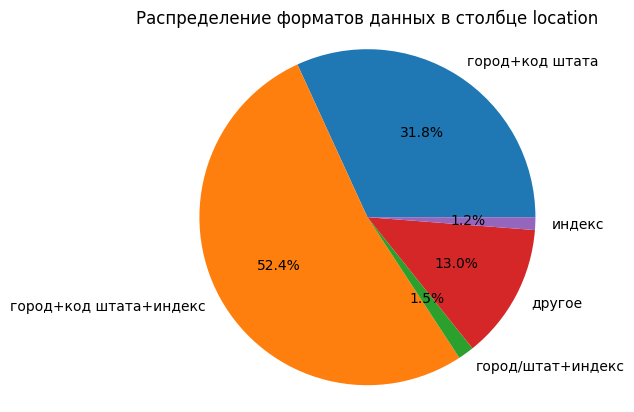

In [ ]:
# Группируем по формату и считаем количество строк у каждого формата
format_counts = df.groupby('format').size()

# Визуализируем на круговой диаграмме
plt.pie(format_counts, labels=format_counts.index, autopct='%1.1f%%')
plt.title('Распределение форматов данных в столбце location')
plt.axis('equal')
plt.show()

Строки с невалидными данными выделяем в отдельный датасет. Остальные данные локаций разделяем на 3 колонки: город, штат, индекс. Колонка индекс будет содержать пустые значения.

In [ ]:
# Удаляем строки с невалидными данными
index_rows = df[df['format'] == 'другое'].index
df.drop(index_rows, inplace=True)
df

,job_description,job_title,job_type,location,organization,salary,sector,format
10167,The Colonial Group specializes in the placemen...,Plant Manager - Operations Excellence Job in C...,Full Time,"Chicago, IL",Manufacturing - Other,"""Best Employer"" excellent compensation and ben...",Manager (Manager/Supervisor of Staff),город+код штата
9401,Job Description Private Family seeks experienc...,Domestic Couple,Full Time,"Bedford, NY",NaN,"$1,000,000.00+ /yearDOE",Student (High School),город+код штата
1103,IMMEDIATE POSITIONS:Class-A Shuttle Driver - S...,Shuttle Driver - Class A CDL Job in Aurora,Full Time,"Aurora, CO 80010",Transport and Storage - Materials,"$1,100.00+ /week",Experienced (Non-Manager),город+код штата+индекс
18079,National staffing company looking for an organ...,Staffing Recruiter Job in Irving,Full Time,"Irving, TX 75061",NaN,$10.00+ /hour,Entry Level,город+код штата+индекс
7396,Excellent phone and communication skills- Cour...,Data Processor Job in Las Vegas,Full Time,"Las Vegas, NV 89147",Accounting and Auditing Services,$10.00+ /hour,Entry Level,город+код штата+индекс
...,...,...,...,...,...,...,...,...
21978,We're excited to be hosting our Saturday hirin...,Cincinnati Job Fair Job in Cincinnati,Part Time,"Cincinnati, OH 45226",Other/Not Classified,NaN,NaN,город+код штата+индекс
21979,• Overall 6-10 years of IT experie...,Enterprise Search Analyst Job in Cincinnati,Full Time,"Cincinnati, OH 45202",Internet Services,NaN,NaN,город+код штата+индекс
21980,Ohio based electrical contractor is seeking ex...,Journeyman Electrician Job in Cincinnati,Full Time,"Cincinnati, OH",All,NaN,NaN,город+код штата
21984,Now Hiring Data Entry Reps and Mail Clerks- ca...,Now Hiring Data Entry Reps and Mail Clerks- ca...,Part Time,"Cincinnati, OH 45214",Other/Not Classified,NaN,NaN,город+код штата+индекс


In [ ]:
# Разделяем локацию на три столбца
def split_location(location, category):
    if category == 'индекс':
        parts = location.split()
        return (None, None, parts[-1])
    elif category == 'город/штат+индекс':
        parts = location.split()
        city = None
        state = None
        zip_code = None
        if len(parts[0]) == 2 and parts[0].isupper():
            state = parts.pop(0)
            city = None
        else:
            city = ' '.join(parts[:-1])
        zip_code = parts[-1]
        return (city, state, zip_code)
    elif category == 'город+код штата+индекс':
        match = re.match(r'^([A-Za-z\s.]+)\,\s([A-Z]{2})\s(\d{5})$', location)
        city = match.group(1)
        state = match.group(2)
        zip_code = match.group(3)
        return (city, state, zip_code)
    elif category == 'город+код штата':
        match = re.match(r'^([A-Za-z\s.]+)\,\s([A-Z]{2})$', location)
        city = match.group(1)
        state = match.group(2)
        zip_code = None
        return (city, state, zip_code)
    else:
        return (None, None, None)
df[['city', 'state', 'zip_code']] = pd.DataFrame(df.apply(lambda row: split_location(row['location'], row['format']), axis=1).tolist(), index=df.index)

df.drop(['format'], axis=1, inplace=True)

In [ ]:
df

,job_description,job_title,job_type,location,organization,salary,sector,city,state,zip_code
10167,The Colonial Group specializes in the placemen...,Plant Manager - Operations Excellence Job in C...,Full Time,"Chicago, IL",Manufacturing - Other,"""Best Employer"" excellent compensation and ben...",Manager (Manager/Supervisor of Staff),Chicago,IL,None
9401,Job Description Private Family seeks experienc...,Domestic Couple,Full Time,"Bedford, NY",NaN,"$1,000,000.00+ /yearDOE",Student (High School),Bedford,NY,None
1103,IMMEDIATE POSITIONS:Class-A Shuttle Driver - S...,Shuttle Driver - Class A CDL Job in Aurora,Full Time,"Aurora, CO 80010",Transport and Storage - Materials,"$1,100.00+ /week",Experienced (Non-Manager),Aurora,CO,80010
18079,National staffing company looking for an organ...,Staffing Recruiter Job in Irving,Full Time,"Irving, TX 75061",NaN,$10.00+ /hour,Entry Level,Irving,TX,75061
7396,Excellent phone and communication skills- Cour...,Data Processor Job in Las Vegas,Full Time,"Las Vegas, NV 89147",Accounting and Auditing Services,$10.00+ /hour,Entry Level,Las Vegas,NV,89147
...,...,...,...,...,...,...,...,...,...,...
21978,We're excited to be hosting our Saturday hirin...,Cincinnati Job Fair Job in Cincinnati,Part Time,"Cincinnati, OH 45226",Other/Not Classified,NaN,NaN,Cincinnati,OH,45226
21979,• Overall 6-10 years of IT experie...,Enterprise Search Analyst Job in Cincinnati,Full Time,"Cincinnati, OH 45202",Internet Services,NaN,NaN,Cincinnati,OH,45202
21980,Ohio based electrical contractor is seeking ex...,Journeyman Electrician Job in Cincinnati,Full Time,"Cincinnati, OH",All,NaN,NaN,Cincinnati,OH,None
21984,Now Hiring Data Entry Reps and Mail Clerks- ca...,Now Hiring Data Entry Reps and Mail Clerks- ca...,Part Time,"Cincinnati, OH 45214",Other/Not Classified,NaN,NaN,Cincinnati,OH,45214


Рассмотрите отложенную часть выборки и сделайте выводы о возможности извлечь из данных город, штат и индекс. Извлеките все, что возможно. Ячейку, в которую невозможно поместить значение, оставьте пустой.

In [ ]:
# В данном куске кода обработаем случае на подобие BostonMA или когда написан только штат

rows_copy = rows.copy()

def analyze_location(location):
    words = location.split()
    if len(words) == 1:
        last_two = words[0][-2:]
        if last_two.isupper():
          if len(words[0]) == 2:
            return None, last_two
          if words[0][-3].islower():
            return words[0][:-2], last_two
    return None, None

# Применение функции к столбцу 'location'
rows_copy[['city', 'state']] = rows_copy['location'].apply(lambda x: pd.Series(analyze_location(x)))

def include_rows():
    filtered_df = rows_copy[(rows_copy['state'].notna())]
    display(filtered_df)
    # Добавление строк обратно в исходный датасет
    result = filtered_df.copy()
    result.drop(columns=['format'], inplace=True)
    result['zip_code'] = None
    for idx, row in result.iterrows():
        df.loc[idx] = row
    # Удаляем строки из числа невалидных
    rows_copy.drop(filtered_df.index, inplace=True)

include_rows()
display(df.sort_index())

,job_description,job_title,job_type,location,organization,salary,sector,format,city,state
20629,"Our client, a language textbook-technology pub...",Multiple Customer Service Representative Openi...,Full Time Temporary/Contract/Project,BostonMA,Education,0.00 - 14.00 $ /hour,Customer Support/Client Care,другое,Boston,MA
20633,Our client is looking for a long term temporar...,Patient Experience Representative / Customer S...,Full Time Temporary/Contract/Project,BostonMA,Healthcare Services,0.00 - 14.00 $ /hour,Customer Support/Client Care,другое,Boston,MA
15858,"Our client, a prominent law firm in Boston, is...",Conference Coordinator at Law Firm- to $k-Bost...,Full Time Temporary/Contract/Project,BostonMA,Legal Services,0.00 - 16.00 $ /hour,Administrative/Clerical,другое,Boston,MA
17696,Our client is looking for Medical Cash Posters...,Medical Cash Applications Specialist Job in Da...,Full Time Employee,DallasTX,Accounting and Auditing Services,0.00 - 17.50 $ /hour,Accounting/Finance/Insurance,другое,Dallas,TX
17673,Our client in the Downtown Dallas area is seek...,Commercial Collections Specialist Job in Dallas,Full Time Employee,DallasTX,Accounting and Auditing Services,0.00 - 18.00 $ /hour,Accounting/Finance/Insurance,другое,Dallas,TX
...,...,...,...,...,...,...,...,...,...,...
515,SECURITY OFFICER - Advancement Opportunity in ...,SECURITY OFFICER - Advancement Opportunity in ...,Full Time Employee,MI,NaN,NaN,Security/Protective Services,другое,None,MI
625,Security Officer - Central Ohio 3872BR Ohio (8...,Security Officer - Central Ohio Job in Ohio US...,Full Time Employee,OH,NaN,NaN,Security/Protective Services,другое,None,OH
514,Security Officer 3740BR Mid-Atlantic 301-459-2...,Security Officer Job in Georgia US body { marg...,Full Time Employee,GA,NaN,NaN,Security/Protective Services,другое,None,GA
629,SECURITY ROVING OFFICER - Promotional Opportun...,SECURITY ROVING OFFICER - Promotional Opportun...,Full Time Employee,MI,NaN,NaN,Security/Protective Services,другое,None,MI


,job_description,job_title,job_type,location,organization,salary,sector,city,state,zip_code
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development,Madison,WI,53702
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN,Madison,WI,53708
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager),Dixon,CA,None
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management,Camphill,PA,None
5,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,NaN,Experienced (Non-Manager),Charlottesville,VA,None
...,...,...,...,...,...,...,...,...,...,...
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN,Cincinnati,OH,None
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),Cincinnati,OH,45236
21997,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,NaN,NaN,Chicago,IL,60602
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,Chicago,IL,60609


In [ ]:
# Здесь обработаем случаи двойных пробелов (и не только)

def double_space_case(location):
    words = location.split()
    if len(words) == 2:
        city = words[0]
        state = words[1]
        if len(state) == 2 and state.isupper():
          if bool(re.search(r'[a-zA-Z]', city)):
            if city.endswith(','):
              return city[:-1], state
            return city, state
          return None, state
    return None, None

rows_copy[['city', 'state']] = rows_copy['location'].apply(lambda x: pd.Series(double_space_case(x)))
include_rows()
df

,job_description,job_title,job_type,location,organization,salary,sector,format,city,state
15675,Software Engineer with FIX Protocol Do you hav...,C# Developer (FIX Protocol) Job in Boston,"Full Time, Employee",Boston MA,NaN,"100,000.00 - 120,000.00 $ /year",NaN,другое,Boston,MA
2424,"Open and Close Dates:Nov 1, 2016 - Nov 14, 201...",Human Resources Specialist Job in Mclean/Arlin...,Full Time,"Mclean/Arlington, VA",Government and Military,"108,887.00 - 141,555.00",Human Resources,другое,Mclean/Arlington,VA
5885,JOB DESCRIPTIONThis leadership position with a...,Vice President,"Full Time, Employee",Boston MA,NaN,"130,000.00 - 160,000.00 $ /year",NaN,другое,Boston,MA
19391,Job Responsibilities:Serves Wendy's customers ...,Restaurant Manager Job in,Full Time,"19063, PA",Restaurant/Food Services,"34,000.00 - 42,000.00 $ /yearquarterly bonus",Manager (Manager/Supervisor of Staff),другое,None,PA
6074,Are you looking for management job opportuniti...,Data Quality Analyst Job in Chicago,"Full Time, Employee",Chicago IL,NaN,50.00 - 70.00 $ /hour,NaN,другое,Chicago,IL
21684,Are you a Client Relationship Specialist with ...,Account Manager Job in Chicago,"Full Time, Employee",Chicago IL,NaN,"65,000.00 - 85,000.00 $ /year",NaN,другое,Chicago,IL
15853,Senior Performance Analyst - Metrowest Area - ...,Senior Performance Analyst,"Full Time, Employee",Boston MA,NaN,"70,000.00 - 100,000.00 $ /year",NaN,другое,Boston,MA
6797,A newly formed Internal Compliance and Audit d...,AVP - Regulatory Controls Consultant Job in Bo...,"Full Time, Employee",Boston MA,NaN,"75,000.00 - 120,000.00 $ /year",NaN,другое,Boston,MA
13527,This position as the Master Black Belt require...,Master Black Belt Job in Boston,"Full Time, Temporary/Contract/Project",Boston MA,NaN,80.00 - 100.00 $ /hour,NaN,другое,Boston,MA
72,Formulation Scientist – Growth Opportunity My ...,"Formulation Scientist Job in ""Statewide""","Full Time, Employee","""Statewide"", CO",NaN,NaN,Biotech/R&D/Science,другое,"""Statewide""",CO


,job_description,job_title,job_type,location,organization,salary,sector,city,state,zip_code
10167,The Colonial Group specializes in the placemen...,Plant Manager - Operations Excellence Job in C...,Full Time,"Chicago, IL",Manufacturing - Other,"""Best Employer"" excellent compensation and ben...",Manager (Manager/Supervisor of Staff),Chicago,IL,None
9401,Job Description Private Family seeks experienc...,Domestic Couple,Full Time,"Bedford, NY",NaN,"$1,000,000.00+ /yearDOE",Student (High School),Bedford,NY,None
1103,IMMEDIATE POSITIONS:Class-A Shuttle Driver - S...,Shuttle Driver - Class A CDL Job in Aurora,Full Time,"Aurora, CO 80010",Transport and Storage - Materials,"$1,100.00+ /week",Experienced (Non-Manager),Aurora,CO,80010
18079,National staffing company looking for an organ...,Staffing Recruiter Job in Irving,Full Time,"Irving, TX 75061",NaN,$10.00+ /hour,Entry Level,Irving,TX,75061
7396,Excellent phone and communication skills- Cour...,Data Processor Job in Las Vegas,Full Time,"Las Vegas, NV 89147",Accounting and Auditing Services,$10.00+ /hour,Entry Level,Las Vegas,NV,89147
...,...,...,...,...,...,...,...,...,...,...
14142,Are you looking to launch and accelerate your ...,Regulatory Communications Coordinator Job in W...,"Full Time, Employee","Winston-Salem, NC",NaN,NaN,NaN,Winston-Salem,NC,None
15766,Senior C# Developer - Boston - FinanceOne of t...,Senior C# Developer - Boston - Finance Job in ...,"Full Time, Employee",Boston MA,NaN,NaN,NaN,Boston,MA,None
15820,Senior Systems Engineer - InfrastructureThis c...,Senior Sysytems Engineer - Infrastructure Job ...,"Full Time, Employee",Boston MA,NaN,NaN,NaN,Boston,MA,None
18803,"NOW HIRING Bussers, Fine dining Servers, SandB...",NOW HIRING Job in -,Full Time,"-, FL",All,NaN,NaN,None,FL,None


Остальные локации, на мой взгляд, не представляется возможным вытянуть из столбца локаций.

#### Обработка колонки salary

Выясните, какие форматы значений есть в столбце `salary`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
df['salary'].value_counts()[:40]

salary
40,000.00 - 100,000.00 $ /year                                     50
Commensurate with Experience                                       38
50,000.00 - 60,000.00 $ /year                                      28
40,000.00 - 50,000.00 $ /year                                      24
75,000.00 - 85,000.00 $ /year                                      22
65,000.00 - 75,000.00 $ /year                                      22
60,000.00 - 70,000.00 $ /year                                      22
60,000.00 - 80,000.00 $ /year                                      21
80,000.00 - 100,000.00 $ /year                                     20
80,000.00 - 90,000.00 $ /year                                      19
70,000.00 - 80,000.00 $ /year                                      18
14.00 - 14.00 $ /hour                                              16
20.00 - 25.00 $ /hour                                              16
14.00 - 16.00 $ /hour                                              16
75,000.00 - 9

У вас должны получиться следующие форматы:
* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

В каждом из форматов может быть и не быть знака доллара.

Последний формат выбивается отсутствием /hour /year в записи, его необходимо внимательно проверить.

Напишем регулярные выражения, обобщающие эти форматы.

Также постараемся определить зп в час, неделю, месяц и год, даже если эти данные "грязные". Почистим их позже

In [ ]:
def check_format(salary):
    if pd.isna(salary):
        return 'Отсутствует'

    hourly_pattern = r'^\s*\d{1,3}(,\d{3})*(\.\d{2})?\s*-\s*\d{1,3}(,\d{3})*(\.\d{2})?\s*\$?\s*\+?\s*/hour\s*$'
    weekly_pattern = r'^\s*\d{1,3}(,\d{3})*(\.\d{2})?\s*-\s*\d{1,3}(,\d{3})*(\.\d{2})?\s*\$?\s*\+?\s*/week\s*$'
    yearly_pattern = r'^\s*\d{1,3}(,\d{3})*(\.\d{2})?\s*-\s*\d{1,3}(,\d{3})*(\.\d{2})?\s*\$?\s*\+?\s*/year\s*$'
    hourly_single_pattern = r'^\s*\$?\d{1,3}(,\d{3})*(\.\d{2})?\s*\+?\s*/hour\s*$'
    weekly_single_pattern = r'^\s*\$?\d{1,3}(,\d{3})*(\.\d{2})?\s*\+?\s*/week\s*$'
    yearly_single_pattern = r'^\s*\$?\d{1,3}(,\d{3})*(\.\d{2})?\+\s*\+?\s*/year\s*$'
    up_to_pattern = r'^\s*Up to\s*\$?\d{1,3}(,\d{3})*(\.\d{2})?\+?\s*$'
    up_to_10000_pattern = r'^\s*Up to\s*\$?\d{1,6}(,\d{3})*(\.\d{2})?$'

    month_pattern = r'\/month'
    year_pattern = r'\/year'
    week_pattern = r'\/week'
    hour_pattern = r'\/hour'


    if re.match(hourly_pattern, salary):
        return '10.00 - 20.00 $ /hour'
    elif re.match(weekly_pattern, salary):
        return '10.00 - 20.00 $ /week'
    elif re.match(yearly_pattern, salary):
        return '10,000.00 - 20,000.00 $ /year'
    elif re.match(hourly_single_pattern, salary):
        return '$10.00+ /hour'
    elif re.match(weekly_single_pattern, salary):
        return '$10.00+ /week'
    elif re.match(yearly_single_pattern, salary):
        return '$10,000.00+ /year'
    elif re.match(up_to_pattern, salary):
        return 'Up to $20,000.00'
    elif re.match(up_to_10000_pattern, salary):
        return 'Up to $20,000.00'

    elif re.search(month_pattern, salary, flags=re.IGNORECASE):
        return 'month'
    elif re.search(year_pattern, salary, flags=re.IGNORECASE):
        return 'year'
    elif re.search(week_pattern, salary, flags=re.IGNORECASE):
        return 'week'
    elif re.search(hour_pattern, salary, flags=re.IGNORECASE):
        return 'hour'

    else:
        return 'Другое'

df['format'] = df['salary'].apply(check_format)


other = df[df['format'] == 'Другое']
other

,job_description,job_title,job_type,location,organization,salary,sector,city,state,zip_code,format
10167,The Colonial Group specializes in the placemen...,Plant Manager - Operations Excellence Job in C...,Full Time,"Chicago, IL",Manufacturing - Other,"""Best Employer"" excellent compensation and ben...",Manager (Manager/Supervisor of Staff),Chicago,IL,None,Другое
19464,The Bridge Behavioral Health is currently seek...,Registered Nurse (RN) Job in Lincoln,Full Time,"Lincoln, NE 68508",Healthcare Services,$1000 HIRING BONUS,Experienced (Non-Manager),Lincoln,NE,68508,Другое
17602,Details:Hilton Garden Inn Dallas/Market Center...,Cook - Hilton Garden Inn Dallas Market Center ...,Full Time,"Dallas, TX 75207",Hotels and Lodging,$12.50-13.00,Experienced (Non-Manager),Dallas,TX,75207,Другое
18048,Details:Looking for a hot job with lot's of si...,Broiler Cook - The Highland Dallas Job in Dallas,Full Time,"Dallas, TX 75206",Hotels and Lodging,$13.50 to $14.00 depending upon experien,Experienced (Non-Manager),Dallas,TX,75206,Другое
7499,DELIVERY DRIVERSExclusively Roses is hiring De...,Delivery Driver Job in Madison,Employee,"Madison, WI 53705",All,$200/Per Day + gas,NaN,Madison,WI,53705,Другое
...,...,...,...,...,...,...,...,...,...,...,...
19013,"Sapp Bros., Inc., a growing chain of travel ce...",Burger King General Manager Job in Cheyenne,Full Time Employee,"Cheyenne, WY 82009",NaN,,Food Services/Hospitality,Cheyenne,WY,82009,Другое
6760,MUST BE 18 YEARS OR OLDER AND HAVE MOTOR VEHIC...,Delivery Drivers,Full Time Employee,"Warren, OH 44483",Restaurant/Food Services,,Food Services/Hospitality,Warren,OH,44483,Другое
13754,"The Senior Manager, QA champions development o...",Senior Manager,"Full Time , Employee","Bowling Green, KY 42101",NaN,,Quality Assurance/Safety,Bowling Green,KY,42101,Другое
7732,This position may work from our Madison WI or ...,Infrastructure / Civil Solutions Consultant Jo...,Full Time,"Madison, WI",Architectural and Design Services,• Generous salary aligned with experience,Experienced (Non-Manager),Madison,WI,None,Другое


Почистим данные, о которых говорилось выше. Уберем лишнюю информацию, если она не содержит данные о бонусах.

In [ ]:
def update_format(row, time):
    if row['format'] == time:
        if 'bonus' in row['salary'].lower():
            return f'{time}+bonus'
        else:
            original_salary = row['salary']
            updated_salary = original_salary.split(f"/{time}")[0].strip()  # Удаляем все после "/hour"
            updated_salary += f" /{time}"  # Добавляем обратно "/hour"
            df.loc[row.name, 'salary'] = updated_salary  # Обновляем значение

    return row['format']


df['format'] = df.apply(update_format, args=("hour",), axis=1)
df['format'] = df.apply(update_format, args=("week",), axis=1)
df['format'] = df.apply(update_format, args=("month",), axis=1)
df['format'] = df.apply(update_format, args=("year",), axis=1)

In [ ]:
hours = df[df['format'] == 'hour']
hours

,job_description,job_title,job_type,location,organization,salary,sector,city,state,zip_code,format
9247,Description:This position involves the fabrica...,Cabinet Maker Job in Kent,Full Time,"Kent, WA",NaN,$15.00+ /hour,Experienced (Non-Manager),Kent,WA,None,hour
19720,CHC is seeking dynamic RNs to be RN Care Coor...,RN Care Coordinator Job in Davenport,Full Time,"Davenport, IA 52801",Healthcare Services,$20.00+ /hour,Experienced (Non-Manager),Davenport,IA,52801,hour
9835,B.A. Morrison Means Quality & ServiceB.A. Morr...,HVAC Installer Job in Castro Valley,Full Time,"Castro Valley, CA 94546",Construction - Residential & Commercial/Office,$25.00+ /hour,Experienced (Non-Manager),Castro Valley,CA,94546,hour
12599,Construction Project Manager -ElectricalPositi...,Electrical Project Manager Job in Terryville,Full Time,"Terryville, CT 06786",Construction - Residential & Commercial/Office,$25.00+ /hour,Experienced (Non-Manager),Terryville,CT,06786,hour
19119,Job Purpose:Serves patrons by setting tables; ...,Server Assistant Job in Saint Petersburg,Full Time,"Saint Petersburg, FL 33701",Restaurant/Food Services,$5.03+ /hour,Entry Level,Saint Petersburg,FL,33701,hour
...,...,...,...,...,...,...,...,...,...,...,...
8084,RN Case Manager Provides services to patien...,Registered Nurse Job in El Paso,Full Time,"El Paso, TX",Healthcare Services,30.00 - 36.00 $ /hour,Experienced (Non-Manager),El Paso,TX,None,hour
5422,Boutique law firm seeks a Spanish-English spea...,Administrative Assistant / Legal Secretary Job...,Full Time,"Irvine, CA 92612",Legal Services,30.00 - 40.00 $ /hour,Experienced (Non-Manager),Irvine,CA,92612,hour
8178,Government contractor is seeking a payroll ana...,Payroll Analyst for government entity Job in R...,Full Time,"Rockville, MD 20850",Government and Military,30.00 - 40.00 $ /hour,Experienced (Non-Manager),Rockville,MD,20850,hour
13740,Job Title: Quality Inspector/CMM Location: Pea...,Quality Control Inspection Technician Job in P...,Full Time,"Peabody, MA",Staffing/Employment Agencies,31.00 - 33.00 $ /hour,Experienced (Non-Manager),Peabody,MA,None,hour


In [ ]:
df

,job_description,job_title,job_type,location,organization,salary,sector,city,state,zip_code,format
10167,The Colonial Group specializes in the placemen...,Plant Manager - Operations Excellence Job in C...,Full Time,"Chicago, IL",Manufacturing - Other,"""Best Employer"" excellent compensation and ben...",Manager (Manager/Supervisor of Staff),Chicago,IL,None,Другое
9401,Job Description Private Family seeks experienc...,Domestic Couple,Full Time,"Bedford, NY",NaN,"$1,000,000.00+ /year",Student (High School),Bedford,NY,None,year
1103,IMMEDIATE POSITIONS:Class-A Shuttle Driver - S...,Shuttle Driver - Class A CDL Job in Aurora,Full Time,"Aurora, CO 80010",Transport and Storage - Materials,"$1,100.00+ /week",Experienced (Non-Manager),Aurora,CO,80010,$10.00+ /week
18079,National staffing company looking for an organ...,Staffing Recruiter Job in Irving,Full Time,"Irving, TX 75061",NaN,$10.00+ /hour,Entry Level,Irving,TX,75061,$10.00+ /hour
7396,Excellent phone and communication skills- Cour...,Data Processor Job in Las Vegas,Full Time,"Las Vegas, NV 89147",Accounting and Auditing Services,$10.00+ /hour,Entry Level,Las Vegas,NV,89147,$10.00+ /hour
...,...,...,...,...,...,...,...,...,...,...,...
14142,Are you looking to launch and accelerate your ...,Regulatory Communications Coordinator Job in W...,"Full Time, Employee","Winston-Salem, NC",NaN,NaN,NaN,Winston-Salem,NC,None,Отсутствует
15766,Senior C# Developer - Boston - FinanceOne of t...,Senior C# Developer - Boston - Finance Job in ...,"Full Time, Employee",Boston MA,NaN,NaN,NaN,Boston,MA,None,Отсутствует
15820,Senior Systems Engineer - InfrastructureThis c...,Senior Sysytems Engineer - Infrastructure Job ...,"Full Time, Employee",Boston MA,NaN,NaN,NaN,Boston,MA,None,Отсутствует
18803,"NOW HIRING Bussers, Fine dining Servers, SandB...",NOW HIRING Job in -,Full Time,"-, FL",All,NaN,NaN,None,FL,None,Отсутствует


Вы наверняка заметили, что есть записи для зарплаты в год и в час без явного разграничения. Для разделения их на категории потребуется фильтровать их по размеру суммы.

Постройте график (удобнее всего гистограмму), чтобы оценить значения в каждой из двух категорий.

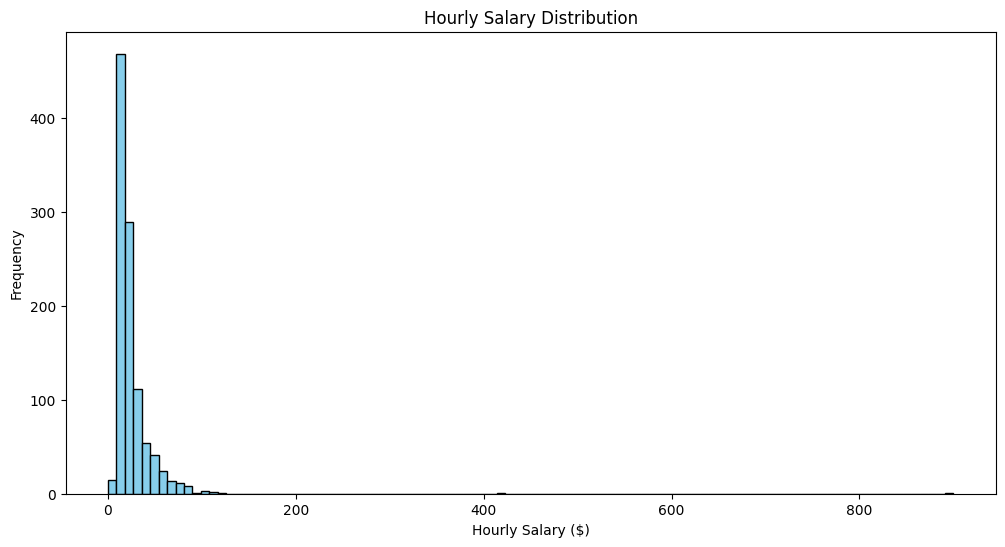

In [ ]:
# Для зп в час
hourly_salary_df = pd.DataFrame(columns=['hour_salary'])

for index, row in df.iterrows():
    # Проверяем, содержит ли формат слово "hour"
    if 'hour' in row['format']:
        # Извлекаем значения зарплаты из строки
        salary_values = re.findall(r'\d+\.\d+', row['salary'])
        # Преобразуем значения в числовой тип данных и добавляем в новый DataFrame
        if len(salary_values) == 2:
            hourly_salary_df.loc[index, 'hour_salary'] = max(float(value) for value in salary_values)
        elif len(salary_values) == 1:
            hourly_salary_df.loc[index, 'hour_salary'] = float(salary_values[0])

# Создаем гистограмму
plt.figure(figsize=(12, 6))
plt.hist(hourly_salary_df['hour_salary'], bins=100, color='skyblue', edgecolor='black')

# Добавляем заголовок и метки осей
plt.title('Hourly Salary Distribution')
plt.xlabel('Hourly Salary ($)')
plt.ylabel('Frequency')

plt.show()

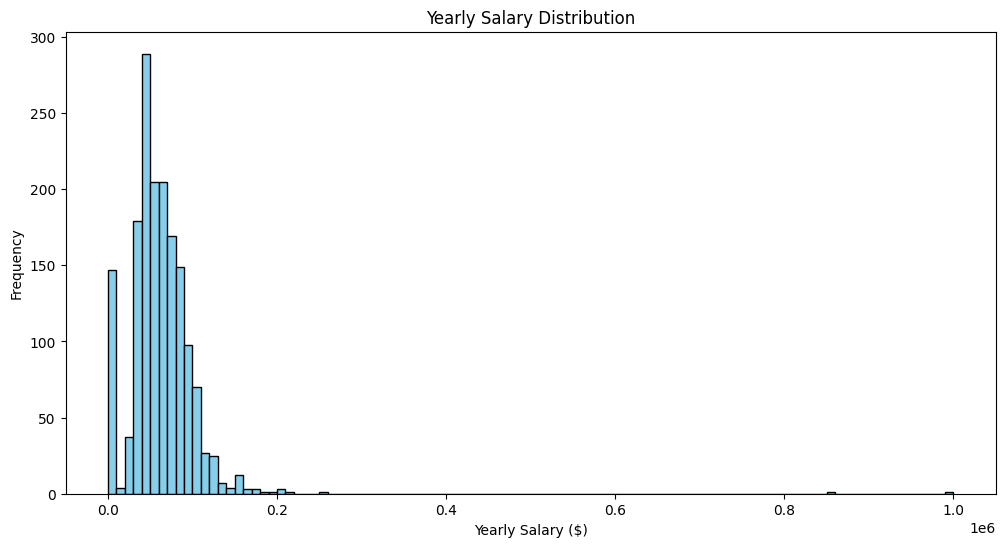

,year_salary
9401,1000000.0
13860,109000.0
20713,11.0
5527,12.0
868,120000.0
...,...
5885,130000.0
19391,34000.0
21684,65000.0
15853,70000.0


In [ ]:
# Для зп в год
yearly_salary_df = pd.DataFrame(columns=['year_salary'])

for index, row in df.iterrows():
    # Проверяем, содержит ли формат слово "year"
    if 'year' in row['format']:
        # Извлекаем значение зарплаты из строки
        salary_value = re.search(r'\d{1,3}(,\d{3})*(\.\d{2})?', row['salary'])
        if salary_value:
            # Преобразуем значение в числовой тип данных и добавляем в новый DataFrame
            yearly_salary_df.loc[index, 'year_salary'] = float(salary_value.group().replace(',', ''))

# Создаем гистограмму
plt.figure(figsize=(12, 6))  # 12 - ширина, 6 - высота
plt.hist(yearly_salary_df['year_salary'], bins=100, color='skyblue', edgecolor='black')

# Добавляем заголовок и метки осей
plt.title('Yearly Salary Distribution')
plt.xlabel('Yearly Salary ($)')
plt.ylabel('Frequency')

plt.show()

yearly_salary_df

Сделайте выводы по графику и выведите правило определения, за какой период времени указана зарплата. Проверьте, что ничего не упустили.

По графикам видно, что зарплаты в час сильно меньше зарплат в год, что логично. Можно предположить, что зарплаты в час в основном до 200 долларов, а в год - до 300000. Однако в датасете также присутствуют другие значения, например зп, указанная в неделю или в месяц. Проанализируем их значения тоже.



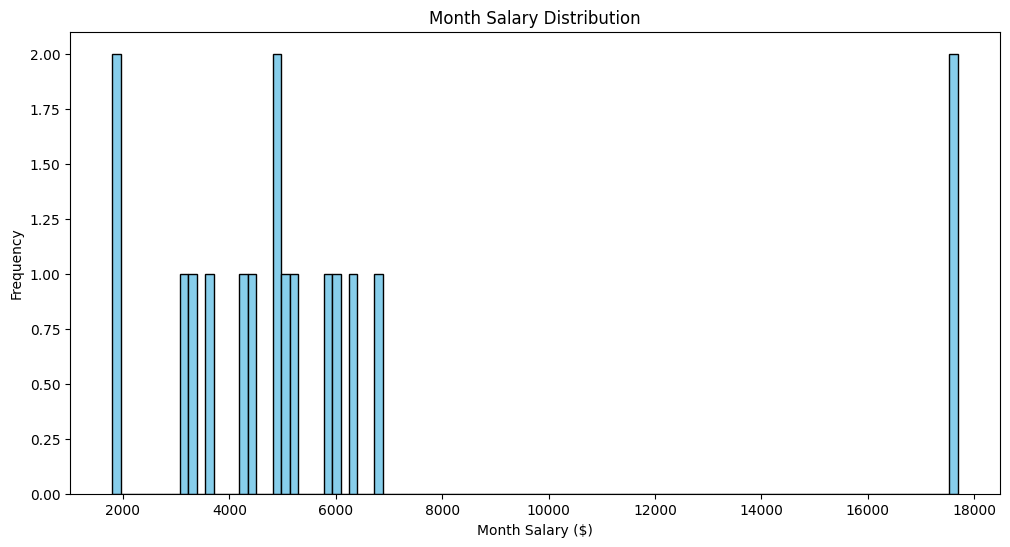

In [ ]:
# Для зп в месяц
month_salary_df = pd.DataFrame(columns=['week_salary'])

for index, row in df.iterrows():
    # Проверяем, содержит ли формат слово "year"
    if 'month' in row['format']:
        # Извлекаем значение зарплаты из строки
        salary_value = re.search(r'\d{1,3}(,\d{3})*(\.\d{2})?', row['salary'])
        if salary_value:
            # Преобразуем значение в числовой тип данных и добавляем в новый DataFrame
            month_salary_df.loc[index, 'month_salary'] = float(salary_value.group().replace(',', ''))

# Создаем гистограмму
plt.figure(figsize=(12, 6))  # 12 - ширина, 6 - высота
plt.hist(month_salary_df['month_salary'], bins=100, color='skyblue', edgecolor='black')

# Добавляем заголовок и метки осей
plt.title('Month Salary Distribution')
plt.xlabel('Month Salary ($)')
plt.ylabel('Frequency')

plt.show()

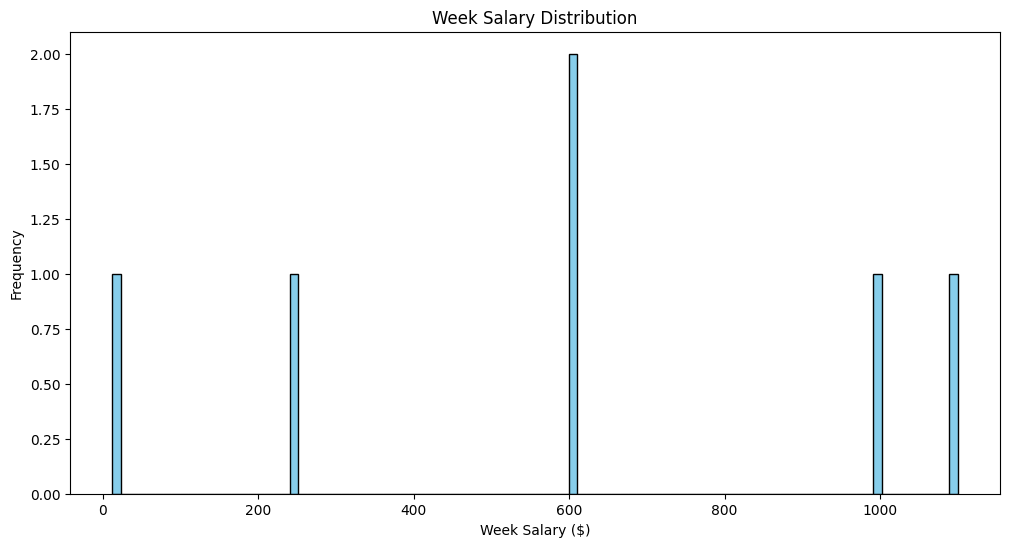

In [ ]:
# Для зп в неделю
week_salary_df = pd.DataFrame(columns=['week_salary'])

for index, row in df.iterrows():
    # Проверяем, содержит ли формат слово "year"
    if 'week' in row['format']:
        # Извлекаем значение зарплаты из строки
        salary_value = re.search(r'\d{1,3}(,\d{3})*(\.\d{2})?', row['salary'])
        if salary_value:
            # Преобразуем значение в числовой тип данных и добавляем в новый DataFrame
            week_salary_df.loc[index, 'week_salary'] = float(salary_value.group().replace(',', ''))

# Создаем гистограмму
plt.figure(figsize=(12, 6))  # 12 - ширина, 6 - высота
plt.hist(week_salary_df['week_salary'], bins=100, color='skyblue', edgecolor='black')

# Добавляем заголовок и метки осей
plt.title('Week Salary Distribution')
plt.xlabel('Week Salary ($)')
plt.ylabel('Frequency')

plt.show()

Исходя из анализов выше, можно сделать следующее предположение о зп:

| Period  | Salary         |
|---------|----------------|
| Hour    | $\$$0 - $\$$200   |
| Week    | $\$$200 - $\$$1500   |
| Month   | $\$$1500 - $\$$18000 |
| Year    | > $\$$18000       |

Теперь обработаем зп, в которых не указан промежуток времени.

In [ ]:
def contains_letters(input_string):
    return any(char.isalpha() for char in input_string)

def convert_to_number(value):
    # Удаление знака доллара, если есть
    value = value.replace('$', '')
    # Удаление запятых, если есть
    value = value.replace(',', '')
    # Разделение значения по символу '-'
    parts = value.split('-')
    # Преобразование каждой части в число и возвращение их в виде списка
    return [float(part.strip()) for part in parts]

# Список для хранения индексов строк, которые нужно обновить
rows_to_update = []

# Проходимся по строкам
for index, row in df.iterrows():
    # Проверяем, если формат 'Другое'
    if row['format'] == 'Другое':
        data = row['salary']
        # Проверяем, что в строке присутствуют только цифры, точка, запятая, тире и знак доллара
        if not contains_letters(data):
            # Находим все числа в строке, учитывая разделители
            numbers = re.findall(r'\d+[\.,]?\d*', data)

            # Преобразуем числа в числовой формат и удаляем символы, отличные от '.' и '-'
            cleaned_numbers = [convert_to_number(number) for number in numbers]

            # Получаем список чисел из разных диапазонов
            all_numbers = [number for sublist in cleaned_numbers for number in sublist]

            # Если есть числа
            if all_numbers:
                # Получаем минимальное и максимальное значение чисел
                min_number = min(all_numbers)
                max_number = max(all_numbers)

                # Проверяем интервалы и добавляем индекс строки в список для обновления
                if 0 <= min_number <= 300 and 0 <= max_number <= 300:
                    rows_to_update.append((index, 'hour'))
                elif 200 <= min_number <= 1500 and 200 <= max_number <= 1500:
                    rows_to_update.append((index, 'week'))
                elif 1500 <= min_number <= 18000 and 1500 <= max_number <= 18000:
                    rows_to_update.append((index, 'month'))
                elif min_number > 18000 or max_number > 18000:
                    rows_to_update.append((index, 'year'))

# Обновляем значения формата
for index, new_format in rows_to_update:
    df.at[index, 'format'] = new_format

In [ ]:
other = df[df['format'] == 'year+bonus']
other

,job_description,job_title,job_type,location,organization,salary,sector,city,state,zip_code,format
5921,Private law firm seeks legal assistant/book ke...,Legal Assistant/Bookkeeper Job in Lakeland,Full Time,"Lakeland, FL",Legal Services,"$33,000.00+ /yearBonus",Experienced (Non-Manager),Lakeland,FL,None,year+bonus
18785,"Mama Leone's150 Connell Highway Newport, RI 02...",Dining Room Manager Job in Newport,Full Time,"Newport, RI 02840",Restaurant/Food Services,"$40,000.00+ /yearbonus,nicentive",Manager (Manager/Supervisor of Staff),Newport,RI,02840,year+bonus
19711,Mama Leone'sGeneral Manager Job Description J...,General Manager Job in Newport,Full Time,"Newport, RI 02840",Restaurant/Food Services,"$45,000.00+ /yearbonus,incentive based",Manager (Manager/Supervisor of Staff),Newport,RI,02840,year+bonus
18741,Description Private Family seeks an experience...,Housekeeper,Full Time,"Southampton, NY",NaN,"$50,000.00+ /yearPTO and potential for bonus",Student (High School),Southampton,NY,None,year+bonus
2052,Duties and Responsibilities The Product Market...,Product Marketing Manager Job in City Of Industry,Full Time,"City Of Industry, CA 91744","City Of Industry, CA 91744","$50,000.00+ /yearbase salary plus bonus",Manager (Manager/Supervisor of Staff),City Of Industry,CA,91744,year+bonus
...,...,...,...,...,...,...,...,...,...,...,...
5923,Corporate Legal Assistant – Blue SkyPrestigiou...,Corporate Legal Assistant – Blue Sky Job in Ne...,Full Time,"New York, NY",Legal Services,"85,000.00 - 100,000.00 $ /yearBonus eligible",Experienced (Non-Manager),New York,NY,None,year+bonus
21519,Callibrity Solutions is an IT consulting servi...,Senior Full Stack Developer Job in Cincinnati,Full Time,"Cincinnati, OH 45201",Computer/IT Services,"90,000.00 - 120,000.00 $ /yearBonus",Experienced (Non-Manager),Cincinnati,OH,45201,year+bonus
17702,The Data Base Administrator (DBA) is responsib...,MS SQL Server DBA Job in Dallas,Full Time,"Dallas, TX",NaN,"90,000.00 - 90,000.00 $ /yearbonus and benefits",NaN,Dallas,TX,None,year+bonus
10846,Transportation /Traffic Engineer- Project Mana...,Traffic Engineer Job in Austin,Full Time,"Austin, TX 78754",NaN,"95,000.00 - 130,000.00 $ /yearbonus and profit...",Manager (Manager/Supervisor of Staff),Austin,TX,78754,year+bonus


Так как ранее мы выделили строки с бонусами, обработаем их.

In [ ]:
def extract_first_word(text):
    return text.split("+")[0]

# Функция для разделения строки по первому встреченному слову и возврата оставшейся части строки
def extract_bonus(text, keyword):
    return text.split(keyword, 1)[-1].strip()

# Создаем новый столбец "bonus" и заполняем его пустыми строками
df['bonus'] = pd.NA

# Проходимся по строкам
for index, row in df.iterrows():
    # Проверяем, если в столбце "format" встречается слово "bonus"
    if 'bonus' in row['format']:
        # Выделяем первое слово из значения "format"
        first_word = extract_first_word(row['format'])
        # Проверяем, если это слово встречается в значении столбца "salary"
        if first_word in row['salary']:
            # Получаем значение для нового столбца "bonus"
            bonus_value = extract_bonus(row['salary'], first_word)
            # Обновляем значение в соответствующей строке столбца "bonus"
            df.at[index, 'bonus'] = bonus_value
            # Обновляем значение в столбце "salary", удаляя все после слова разделитель
            df.at[index, 'salary'] = row['salary'].split(first_word, 1)[0].strip()

In [ ]:
other = df[df['format'] == 'year+bonus']
other

,job_description,job_title,job_type,location,organization,salary,sector,city,state,zip_code,format,bonus
5921,Private law firm seeks legal assistant/book ke...,Legal Assistant/Bookkeeper Job in Lakeland,Full Time,"Lakeland, FL",Legal Services,"$33,000.00+ /",Experienced (Non-Manager),Lakeland,FL,None,year+bonus,Bonus
18785,"Mama Leone's150 Connell Highway Newport, RI 02...",Dining Room Manager Job in Newport,Full Time,"Newport, RI 02840",Restaurant/Food Services,"$40,000.00+ /",Manager (Manager/Supervisor of Staff),Newport,RI,02840,year+bonus,"bonus,nicentive"
19711,Mama Leone'sGeneral Manager Job Description J...,General Manager Job in Newport,Full Time,"Newport, RI 02840",Restaurant/Food Services,"$45,000.00+ /",Manager (Manager/Supervisor of Staff),Newport,RI,02840,year+bonus,"bonus,incentive based"
18741,Description Private Family seeks an experience...,Housekeeper,Full Time,"Southampton, NY",NaN,"$50,000.00+ /",Student (High School),Southampton,NY,None,year+bonus,PTO and potential for bonus
2052,Duties and Responsibilities The Product Market...,Product Marketing Manager Job in City Of Industry,Full Time,"City Of Industry, CA 91744","City Of Industry, CA 91744","$50,000.00+ /",Manager (Manager/Supervisor of Staff),City Of Industry,CA,91744,year+bonus,base salary plus bonus
...,...,...,...,...,...,...,...,...,...,...,...,...
5923,Corporate Legal Assistant – Blue SkyPrestigiou...,Corporate Legal Assistant – Blue Sky Job in Ne...,Full Time,"New York, NY",Legal Services,"85,000.00 - 100,000.00 $ /",Experienced (Non-Manager),New York,NY,None,year+bonus,Bonus eligible
21519,Callibrity Solutions is an IT consulting servi...,Senior Full Stack Developer Job in Cincinnati,Full Time,"Cincinnati, OH 45201",Computer/IT Services,"90,000.00 - 120,000.00 $ /",Experienced (Non-Manager),Cincinnati,OH,45201,year+bonus,Bonus
17702,The Data Base Administrator (DBA) is responsib...,MS SQL Server DBA Job in Dallas,Full Time,"Dallas, TX",NaN,"90,000.00 - 90,000.00 $ /",NaN,Dallas,TX,None,year+bonus,bonus and benefits
10846,Transportation /Traffic Engineer- Project Mana...,Traffic Engineer Job in Austin,Full Time,"Austin, TX 78754",NaN,"95,000.00 - 130,000.00 $ /",Manager (Manager/Supervisor of Staff),Austin,TX,78754,year+bonus,bonus and profit sharing


**Что мы можем увидеть?**

Зарплата также может быть указана в месяц (month) и в неделю (week) – учтите это при составлении общего регулярного выражения.

Также в начале некоторых строк есть лишние пробелы, которые мы также учитываем.

Разделим столбец `salary` на зарплаты от, до, временной интервал (час, месяц, год) и бонусы. Для строк не попавших ни в одну категорию или с NaN в колонке salary установим все как NaN.

Также добавим колонку которая разделяет тип предложений (от-до, от, до, нет).

In [ ]:
def clean_salary(s):
    if isinstance(s, str):
        s = s.split('/')[0]  # Удаляем все после символа /
        return s.replace('$', '')  # Удаляем знак $
    return s

# Создаем новые столбцы
df['from ($)'] = pd.NA
df['to ($)'] = pd.NA
df['interval'] = pd.NA
df['type'] = pd.NA

for index, row in df.iterrows():
    if row['format'] == 'Другое':
        # Устанавливаем значение столбца 'salary' на NaN
        df.at[index, 'salary'] = pd.NA
    elif 'hour' in row['format']:
        df.at[index, 'interval'] = 'hour'
    elif 'week' in row['format']:
        df.at[index, 'interval'] = 'week'
    elif 'month' in row['format']:
        df.at[index, 'interval'] = 'month'
    elif 'year' in row['format']:
        df.at[index, 'interval'] = 'year'

    salary = clean_salary(row['salary'])

    # Определяем тип зарплаты, если salary не NaN
    if not pd.isna(salary):
            if '-' in salary:
                df.at[index, 'type'] = 'от-до'
                parts = salary.split('-')
                df.at[index, 'from ($)'] = parts[0].strip()
                df.at[index, 'to ($)'] = parts[1].strip()
            elif 'Up to' in salary:
                df.at[index, 'type'] = 'до'
                parts = salary.split('Up to')
                df.at[index, 'from ($)'] = pd.NA
                df.at[index, 'to ($)'] = parts[1].strip()
            elif '+' in salary:
                df.at[index, 'type'] = 'от'
                parts = salary.split('+')
                df.at[index, 'from ($)'] = parts[0].strip()
                df.at[index, 'to ($)'] = pd.NA
            else:
                df.at[index, 'type'] = 'нет'
                df.at[index, 'from ($)'] = salary
                df.at[index, 'to ($)'] = salary

In [ ]:
other = df[df['interval'] == 'hour']
other

,job_description,job_title,job_type,location,organization,salary,sector,city,state,zip_code,format,bonus,from ($),to ($),interval,type
18079,National staffing company looking for an organ...,Staffing Recruiter Job in Irving,Full Time,"Irving, TX 75061",NaN,$10.00+ /hour,Entry Level,Irving,TX,75061,$10.00+ /hour,NaN,10.00,NaN,hour,от
7396,Excellent phone and communication skills- Cour...,Data Processor Job in Las Vegas,Full Time,"Las Vegas, NV 89147",Accounting and Auditing Services,$10.00+ /hour,Entry Level,Las Vegas,NV,89147,$10.00+ /hour,NaN,10.00,NaN,hour,от
19176,"North Side LTC Facility Is Seeking RN, LPN&Cer...",RN,Full Time,"Chicago, IL 60626",Healthcare Services,$10.00+ /hour,NaN,Chicago,IL,60626,$10.00+ /hour,NaN,10.00,NaN,hour,от
18999,Water's Edge Health Care at Sandhill Cove has...,Dietary Server Job in Palm City,Part Time Employee,"Palm City, FL 34990",NaN,$10.00+ /hour,Food Services/Hospitality,Palm City,FL,34990,$10.00+ /hour,NaN,10.00,NaN,hour,от
17882,Job DescriptionResponsibilities: Answer signal...,Certified Nursing Assistant (CNA) Job in Irving,Full Time,"Irving, TX 75061",Healthcare Services,$10.00+ /hour,Entry Level,Irving,TX,75061,$10.00+ /hour,NaN,10.00,NaN,hour,от
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12344,"Our client, a prestigious investment firm loca...",Administrative Assistant Job in Chicago,Full Time Employee,ChicagoIL,Financial Services,18.00 - 20.00 $ /hour,Administrative/Clerical,Chicago,IL,None,10.00 - 20.00 $ /hour,NaN,18.00,20.00,hour,от-до
17492,Our client is a well-known industry leader tha...,Staff Accountant Job in Dallas,Full Time Employee,DallasTX,Accounting and Auditing Services,24.00 - 25.00 $ /hour,Accounting/Finance/Insurance,Dallas,TX,None,10.00 - 20.00 $ /hour,NaN,24.00,25.00,hour,от-до
7839,"Our client in Madison, WI is looking to add a ...",Network Engineer Job in Madison,Full Time Temporary/Contract/Project,MadisonWI,Internet Services Computer Software Computer/I...,35.00 - 46.00 $ /hour,IT/Software Development,Madison,WI,None,10.00 - 20.00 $ /hour,NaN,35.00,46.00,hour,от-до
6074,Are you looking for management job opportuniti...,Data Quality Analyst Job in Chicago,"Full Time, Employee",Chicago IL,NaN,50.00 - 70.00 $ /hour,NaN,Chicago,IL,None,10.00 - 20.00 $ /hour,NaN,50.00,70.00,hour,от-до


Теперь мы вытащили все полезные данные из столбца salary. Его и столбец format можно убрать.

In [ ]:
df.drop(columns=['salary', 'format'], inplace=True)
df.sample(30)

,job_description,job_title,job_type,location,organization,sector,city,state,zip_code,bonus,from ($),to ($),interval,type
16635,Position Title: Project ManagerRequired Skills...,Project Manager Job in Columbus,Full Time Employee,ColumbusOH,Computer/IT Services,IT/Software Development,Columbus,OH,None,<NA>,<NA>,<NA>,<NA>,<NA>
15044,11B Infantryman - Management Training Job Desc...,B Infantryman - Management Training Job in Ind...,Full Time Employee,"Indiana, PA 15701",NaN,Entry Level,Indiana,PA,15701,<NA>,<NA>,<NA>,<NA>,<NA>
17187,"Join an exciting, fast paced, growing, family ...",Sales Associate Job in Irving,Full Time,"Irving, TX 75060",Retail,Experienced (Non-Manager),Irving,TX,75060,Bonus,10.00,11.50,hour,от-до
10005,1101 Marketing Group is one of the top promoti...,Entry Level Management - Marketing Job in Cinc...,Full Time Employee,"Cincinnati, OH 45241",RetailAdvertising and PR ServicesManagement Co...,Marketing/Product,Cincinnati,OH,45241,<NA>,<NA>,<NA>,<NA>,<NA>
19388,Ninety Nine Restaurant & Pub is one of the lar...,Restaurant Kitchen Manager Job in Easton,Full Time,"Easton, MA 02356",Restaurant/Food Services,NaN,Easton,MA,02356,<NA>,<NA>,<NA>,<NA>,<NA>
2011,The Agile Project Manager will manage applicat...,IT Project Manager Job in Washington,Full Time,"Washington, IL 61571",Manufacturing - Other,Experienced (Non-Manager),Washington,IL,61571,<NA>,<NA>,<NA>,<NA>,<NA>
13016,"Springwell is seeking a creative, hard-working...",Program Manager Job in North Waltham,Full Time,"North Waltham, MA 02452",NaN,NaN,North Waltham,MA,02452,<NA>,<NA>,<NA>,<NA>,<NA>
16158,We are seeking an Accounting Manager to overse...,Accounting Manager - Special Projects Job in P...,Full Time,"Plymouth, MI 48170",NaN,Accounting/Finance/Insurance,Plymouth,MI,48170,<NA>,<NA>,<NA>,<NA>,<NA>
11713,Job Description:Job Duties for the Administrat...,Administrative Assistant Job in San Francisco,Full Time Employee,"San Francisco, CA 94104",Other/Not Classified,Experienced (Non-Manager),San Francisco,CA,94104,<NA>,<NA>,<NA>,<NA>,<NA>
1557,Company Profile: Precision Castparts Corp. (PC...,Quality Engineer Job in Wichita,Full Time Employee,"Wichita, KS 67217",Aerospace and Defense,Quality Assurance/Safety,Wichita,KS,67217,<NA>,<NA>,<NA>,<NA>,<NA>


#### Обработка колонки job_type

Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
df['job_type'].value_counts()[:40]

job_type
Full Time                                        6310
Full Time Employee                               5880
Full Time, Employee                              2165
Full Time Temporary/Contract/Project              740
Full Time, Temporary/Contract/Project             449
Part Time                                         311
Part Time Employee                                311
Full Time , Employee                              303
Temporary/Contract/Project                        159
Part Time, Employee                               151
Employee                                          133
Full Time / Employee                              103
Full Time , Temporary/Contract/Project             43
Per Diem                                           22
Per Diem, Employee                                 21
Job Type Full Time Employee                        19
Part Time/ Temporary/Contract/Project              14
Part Time Seasonal                                 12
Per Diem Employee  

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [ ]:
def parse_job_type(j_type):
    j_type = str(j_type).lower().replace(',', '').replace('/', ' ').strip()
    time_types = ['full time', 'part time', 'per diem']
    time_type = None

    for t in time_types:
        if t in j_type:
            time_type = t
            break

    j_type = ' '.join(j_type.split())
    index = j_type.find(str(time_type))
    job_type = j_type[index + len(time_type) + 1:] if index > -1 else None
    return time_type, job_type if job_type else None

In [ ]:
df.job_type.apply(parse_job_type).value_counts()

job_type
(full time, employee)                      8471
(full time, None)                          6312
(None, None)                               1531
(full time, temporary contract project)    1234
(part time, employee)                       470
(part time, None)                           311
(per diem, employee)                         32
(part time, temporary contract project)      26
(per diem, None)                             22
(part time, seasonal)                        12
(full time, intern)                           5
(part time, intern)                           3
(per diem, temporary contract project)        1
Name: count, dtype: int64

Теперь видно, что тип работы состоит из двух частей: полноты занятости (Full Time, Part Time, ...) и типа занятости (Employee, Intern, ...). Встречаются неполные записи. Будем считать по умолчанию полноту занятости Full Time и тип занятости Employee и разделим эту колонку на две.

In [ ]:
df[['time_type', 'employment_type']] = df['job_type'].str.split(',', expand=True)

df['time_type'] = df['time_type'].str.strip()
df['employment_type'] = df['employment_type'].str.strip()

In [ ]:
df

,job_description,job_title,job_type,location,organization,sector,city,state,zip_code,bonus,from ($),to ($),interval,type,time_type,employment_type
10167,The Colonial Group specializes in the placemen...,Plant Manager - Operations Excellence Job in C...,Full Time,"Chicago, IL",Manufacturing - Other,Manager (Manager/Supervisor of Staff),Chicago,IL,None,NaN,"""Best Employer"" excellent compensation and ben...","""Best Employer"" excellent compensation and ben...",<NA>,нет,Full Time,None
9401,Job Description Private Family seeks experienc...,Domestic Couple,Full Time,"Bedford, NY",NaN,Student (High School),Bedford,NY,None,NaN,"1,000,000.00",<NA>,year,от,Full Time,None
1103,IMMEDIATE POSITIONS:Class-A Shuttle Driver - S...,Shuttle Driver - Class A CDL Job in Aurora,Full Time,"Aurora, CO 80010",Transport and Storage - Materials,Experienced (Non-Manager),Aurora,CO,80010,NaN,"1,100.00",<NA>,week,от,Full Time,None
18079,National staffing company looking for an organ...,Staffing Recruiter Job in Irving,Full Time,"Irving, TX 75061",NaN,Entry Level,Irving,TX,75061,NaN,10.00,<NA>,hour,от,Full Time,None
7396,Excellent phone and communication skills- Cour...,Data Processor Job in Las Vegas,Full Time,"Las Vegas, NV 89147",Accounting and Auditing Services,Entry Level,Las Vegas,NV,89147,NaN,10.00,<NA>,hour,от,Full Time,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14142,Are you looking to launch and accelerate your ...,Regulatory Communications Coordinator Job in W...,"Full Time, Employee","Winston-Salem, NC",NaN,NaN,Winston-Salem,NC,None,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
15766,Senior C# Developer - Boston - FinanceOne of t...,Senior C# Developer - Boston - Finance Job in ...,"Full Time, Employee",Boston MA,NaN,NaN,Boston,MA,None,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
15820,Senior Systems Engineer - InfrastructureThis c...,Senior Sysytems Engineer - Infrastructure Job ...,"Full Time, Employee",Boston MA,NaN,NaN,Boston,MA,None,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
18803,"NOW HIRING Bussers, Fine dining Servers, SandB...",NOW HIRING Job in -,Full Time,"-, FL",All,NaN,None,FL,None,NaN,NaN,NaN,NaN,NaN,Full Time,None


Колонку `job_description` оставим без изменения, так как она содержит текстовое описание вакансии.

### Краткая статистика очищенных данных

Сравним, что было до и что стало после.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18430 entries, 10167 to 21316
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_description  18430 non-null  object
 1   job_title        18430 non-null  object
 2   job_type         17192 non-null  object
 3   location         18430 non-null  object
 4   organization     12430 non-null  object
 5   sector           14623 non-null  object
 6   city             17924 non-null  object
 7   state            17876 non-null  object
 8   zip_code         11473 non-null  object
 9   bonus            183 non-null    object
 10  from ($)         3117 non-null   object
 11  to ($)           3021 non-null   object
 12  interval         2721 non-null   object
 13  type             3208 non-null   object
 14  time_type        17192 non-null  object
 15  employment_type  3145 non-null   object
dtypes: object(16)
memory usage: 2.9+ MB


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB
